In [1]:
import sys # required for relative imports in jupyter lab
sys.path.insert(0, '../') 

from cosmosis.model import tv_model
from cosmosis.learning import Learn, Selector
from cosmosis.dataset import LoadImage, AsTensor, Transpose

from dataset import Ranzcr
from learning import RSelector

from torch.optim import Adam
from torch.nn import BCEWithLogitsLoss, CrossEntropyLoss
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision import transforms

from IPython.display import display


CDataset created...
CDataset created...
CDataset created...
TorchVision model resnet18 loaded...
epoch: 0 of 10, train loss: 1.9703012105676483, val loss: 2.5918873419331576, lr: 0.01
epoch: 1 of 10, train loss: 1.343777916102772, val loss: 2.5388077722063245, lr: 0.01
epoch: 2 of 10, train loss: 1.4045016292110328, val loss: 2.897991737380235, lr: 0.01
epoch: 3 of 10, train loss: 1.5631510717961645, val loss: 2.5316522155329215, lr: 0.01
epoch: 4 of 10, train loss: 1.4212110213444684, val loss: 7.43883593158519, lr: 0.01
epoch: 5 of 10, train loss: 1.7414849334221798, val loss: 2.3406280799189267, lr: 0.01
epoch: 6 of 10, train loss: 1.509659941494465, val loss: 0.8716596547804826, lr: 0.01
epoch: 7 of 10, train loss: 1.054342712799371, val loss: 3.8430710922709057, lr: 0.01
epoch: 8 of 10, train loss: 1.3508834657086908, val loss: 6.58781596653639, lr: 0.01
epoch: 9 of 10, train loss: 1.5494467934488056, val loss: 1.6809446216157988, lr: 0.005
test loss: 1.7365290459028888
y_pred:
te

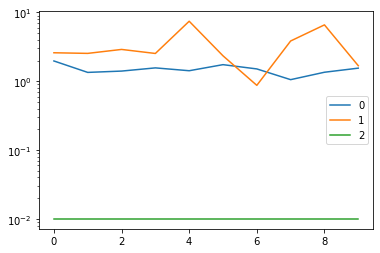

learning time: 0:07:56.907919


In [2]:
#TODO turn targets into ints also with none category
#re-balanced datasets
#create models for each target_type
#accuracy metric AUC for each category averaged see kaggle
#dataset normalization

ds_params={'train_params': {'embed': [],
                            'image_dir': './data/ranzcr/train',
                            'target_csv': './data/ranzcr/train.csv',
                            'target_type': 'ETT',
                            'transform': transforms.Compose([LoadImage(),
                                                             transforms.RandomRotation(10),
                                                             transforms.Resize(1500),
                                                             transforms.CenterCrop(1200),
                                                             transforms.Resize(300),
                                                             transforms.RandomCrop(244),
                                                             transforms.ToTensor(),
                                                             ]),
                            'target_transform': transforms.Compose([AsTensor(),
                                                                   ])},
           'val_params': {'embed': [],
                          'image_dir': './data/ranzcr/train',
                          'target_csv': './data/ranzcr/train.csv',
                          'target_type': 'ETT',
                          'transform': transforms.Compose([LoadImage(),
                                                           transforms.Resize(1500),
                                                           transforms.CenterCrop(1200),
                                                           transforms.Resize(300),
                                                           transforms.CenterCrop(244),
                                                           transforms.ToTensor(),
                                                           ]),
                          'target_transform': transforms.Compose([AsTensor(),
                                                                  ])},
           'test_params': {'embed': [],
                           'image_dir': './data/ranzcr/train',
                           'target_csv': './data/ranzcr/train.csv',
                           'target_type': 'ETT',
                           'transform': transforms.Compose([LoadImage(),
                                                            transforms.Resize(1500),
                                                            transforms.CenterCrop(1200),
                                                            transforms.Resize(300),
                                                            transforms.CenterCrop(244),
                                                            transforms.ToTensor(),
                                                            ]),
                          'target_transform': transforms.Compose([AsTensor(),
                                                                  ])}}

model_params = {'model_name': 'resnet18',
                'in_channels': 1,
                'tv_params': {'num_classes': 4}} 
    
opt_params = {'lr': 0.01}
crit_params = {'reduction': 'sum'}

#RSelector balances classes (target_type) of the Ranzcr ds
sample_params = {'set_seed': False,
                 'splits': (.7,.15),
                 'target_type': 'ETT'}

sched_params = {'factor': .5,
                'patience': 2,
                'cooldown': 2}

l = Learn([Ranzcr,Ranzcr,Ranzcr], tv_model, RSelector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=CrossEntropyLoss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=16, epochs=10)

In [ ]:
ds_params={'train_params': {'embed': [],
                            'image_dir': './data/ranzcr/train',
                            'target_csv': './data/ranzcr/train.csv',
                            'target_type': 'ETT',
                            'transform': transforms.Compose([LoadImage(),
                                                             #transforms.RandomRotation(10),
                                                             #transforms.Resize((1500)),
                                                             #transforms.CenterCrop(1200),
                                                             #transforms.Resize((300)),
                                                             #transforms.CenterCrop(244),
                                                             #transforms.ToTensor(),
                                                             #transforms.Normalize(0.3,0.3),
                                                             #transforms.ToPILImage(),
                                                             ]),
                            'target_transform': AsTensor()}}

ranzcr = Ranzcr(**ds_params['train_params'])

In [ ]:
ranzcr.ds_idx[0]

In [ ]:
ranzcr['1.2.826.0.1.3680043.8.498.86119358030110783442164990675803210852'][1].shape

In [ ]:
display(ranzcr['1.2.826.0.1.3680043.8.498.86119358030110783442164990675803210852'][0])

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('./data/ranzcr/train.csv', header=0, index_col=0)

In [ ]:
df.describe()

In [ ]:
df.loc['1.2.826.0.1.3680043.8.498.12976413966762576562651637188467814800']

In [ ]:
print(df.shape)
df.iloc[0]

In [ ]:
pos = df.loc[(df.iloc[:,3] == 1) & (df.iloc[:,4] == 0) & (df.iloc[:,5] == 0) & (df.iloc[:,6] == 1)]
pos
#neg = df.loc[df.iloc[:,:3] == 0].sample(pos.shape[0])
#neg.shape


In [ ]:
pos

In [ ]:
import numpy as np

In [ ]:
df = pd.read_csv('./data/ranzcr/train.csv', header=0, index_col=0)

In [ ]:

s0 = list(df.loc[(df.iloc[:,0] == 1)].index.to_numpy())
cut1 = int(len(s0)*.7)
cut2 = int(len(s0)*.15)
s0train = s0[:cut1]
s0train = np.random.choice(s0train, 128, replace=True)
s0val = s0[cut1:cut1+cut2]
s0test = s0[cut1+cut2:]

s1 = list(df.loc[(df.iloc[:,1] == 1)].index.to_numpy())
cut1 = int(len(s1)*.7)
cut2 = int(len(s1)*.15)
s1train = s1[:cut1]
s1train = np.random.choice(s1train, 256, replace=False)
s1val = s1[cut1:cut1+cut2]
s1test = s1[cut1+cut2:]

s2 = list(df.loc[(df.iloc[:,2] == 1)].index.to_numpy())
cut1 = int(len(s2)*.7)
cut2 = int(len(s2)*.15)
s2train = s2[:cut1]
s2train = np.random.choice(s2train, 512, replace=False)
s2val = s2[cut1:cut1+cut2]
s2test = s2[cut1+cut2:]

s3 = list(df.loc[(df.iloc[:,0] == 0) & (df.iloc[:,1] == 0) & (df.iloc[:,2] == 0)].index.to_numpy())
cut1 = int(len(s3)*.7)
cut2 = int(len(s3)*.15)
s3train = s3[:cut1]
s3train = np.random.choice(s3train, 1024, replace=False)
s3val = s3[cut1:cut1+cut2]
s3test = s3[cut1+cut2:]

train_idx = np.concatenate([s0train,s1train,s2train,s3train])
val_idx = np.concatenate([s0val,s1val,s2val,s3val])
test_idx = np.concatenate([s0test,s1test,s2test,s3test])


In [ ]:
arr = np.asarray([0,0,0])
res = np.where(arr == 1)[0] + 1
len(res)